<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report # Import necessary functions


In [4]:
# Import dataset
data = pd.read_csv("amazon.csv")

In [11]:
def clean_text_v2(text):
    """
    This function cleans the input text by removing punctuation,
    converting to lowercase, and removing extra whitespaces.

    Args:
        text (str): The input text string.

    Returns:
        str: The cleaned text string.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub('[' + string.punctuation + ']', '', text)  # Remove punctuation
    text = re.sub('\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

In [12]:
# Text preprocessing function (using the now defined clean_text_v2)
data['review_content'] = data['review_content'].apply(clean_text_v2)

# Convert ratings to sentiment labels: Positive (4 and 5), Neutral (3), Negative (1 and 2)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Drop rows with missing sentiment
data = data.dropna(subset=['sentiment', 'review_content'])

In [13]:
# Extract features and labels
X = data['review_content']
y = data['sentiment']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Convert text data to numerical data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [19]:
# Make predictions
y_pred_knn = knn_model.predict(X_test_tfidf)

In [22]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn, report_knn

(0.7522727272727273,
 '              precision    recall  f1-score   support\n\n     neutral       0.58      0.17      0.26       114\n    positive       0.77      0.96      0.85       326\n\n    accuracy                           0.75       440\n   macro avg       0.67      0.56      0.55       440\nweighted avg       0.72      0.75      0.70       440\n')

<ipython-input-24-806dea02dc20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='Set2')


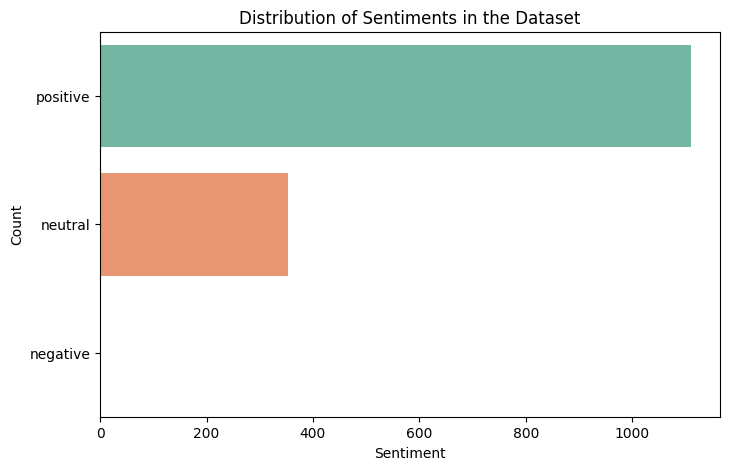

In [24]:
# Visualization 1: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['sentiment'], palette='Set2')
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()